In [5]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
twitch = nx.read_edgelist("musae_edges.csv",delimiter=',',nodetype=int)

In [46]:
degrees = pd.DataFrame(twitch.degree,columns=["node","degree"])
degrees

,node,degree
0,6194,6
1,255,6
2,980,18
3,2992,4
4,2507,22
...,...,...
7121,2933,1
7122,2267,1
7123,6694,1
7124,6995,1


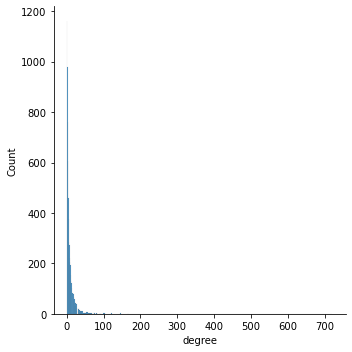

In [12]:
import seaborn as sns
hist = sns.displot(data=degrees,x="degree")

Let's compare the distribution to that of a random graph of the same size and edge density.

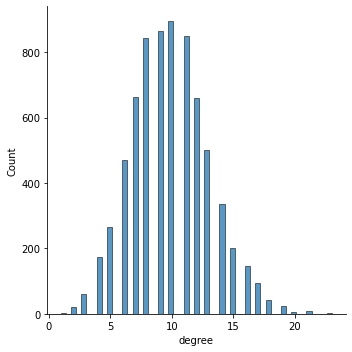

In [45]:
n = nx.number_of_nodes(twitch)
p = nx.number_of_edges(twitch)/(n*(n+1)/2)
rando = nx.erdos_renyi_graph(n,p)

dd = pd.DataFrame(rando.degree,columns=["node","degree"])
hist = sns.displot(data=dd,x="degree")


This is nothing like the Twitch network. This observation is general and well-known: *social networks are not like random networks.*

The behavior of the Twitch degree distribution gets very interesting when the axes are transformed to use log scales: 

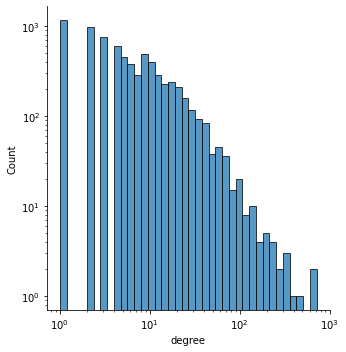

In [13]:
hist = sns.displot(data=degrees,x="degree",log_scale=True)
hist.axes[0,0].set_yscale("log")

For degrees between 10 and several hundred, the counts lie nearly on a straight line. That is, if $x$ is degree and $y$ is the node count at that degree, then

$$
\log(y) \approx a\cdot \log(x) + b,
$$

i.e.,

$$
y \approx B x^a,
$$

which is known as a **power law**. Many social networks follow a power-law distrubution of node degrees.

We can get a fair estimate of the constants $B$ and $a$ in the power law by doing a least-squares fit on the logs of $x$ and $y$. First, we need the counts:

In [48]:
y = degrees["degree"].value_counts()
counts = pd.DataFrame({"degree":y.index,"count":y.values})
counts

,degree,count
0,1,1161
1,2,979
2,3,761
3,4,605
4,5,458
...,...,...
125,151,1
126,106,1
127,115,1
128,231,1


Now we will get additional columns by log transformations. (Note: the `np.log` function is the natural logarithm.)

In [49]:
counts[["log_x","log_y"]] = counts.transform(np.log)

Now we use `sklearn` for a linear regression.

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(counts[["log_x"]],counts["log_y"])
lm.coef_,lm.intercept_

(array([-1.58032869]), 8.174146377879476)

The first value, which is both the slope of the line and the exponent of the power law, is the most interesting part. It estimates that the degree counts vary as $Bx^{-1.58}$ over at least one order of magnitude.

In [53]:
y.std()

167.1787691267947

In [70]:
nx.shortest_path_length(twitch,source=0,target=1000)

6

In [80]:
pathlen = np.array([ [ nx.shortest_path_length(twitch,i,j) for j in range(i)] for i in range(n) ])
sp

KeyboardInterrupt: 

In [87]:
pathlen = np.zeros((n,n),dtype=int)
for i in range(n):
    sp = nx.shortest_path_length(twitch,source=i)
    pathlen[i,:i] = [sp[j] for j in range(i)]

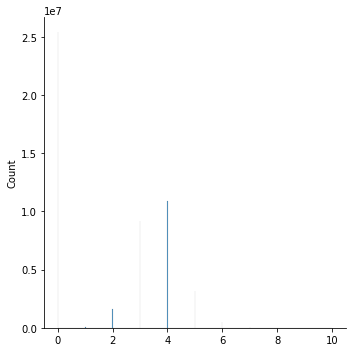

In [91]:
sns.displot(data=pathlen.flatten())

In [92]:
np.max(pathlen)

10

In [93]:
nx.diameter(twitch)

10

In [94]:
nx.average_shortest_path_length(twitch)

3.6776157289097005

In [95]:
np.sum(pathlen)/(n*(n-1)/2)

3.6776157289097005